# Assignment on Preprocessing

1. Loading Dataset

In [146]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [147]:
Data = pd.read_csv(r"C:\Users\hp\Desktop\titanic_dataset.csv")
Data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2. Making Passenger ID as Index column

In [148]:
Tic = pd.read_csv(r"C:\Users\hp\Desktop\titanic_dataset.csv",index_col='PassengerId')
Tic.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


3. Checking Basic details

In [149]:
Tic.shape

(891, 11)

In [150]:
Tic.ndim

2

In [151]:
Tic.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [152]:
Tic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [153]:
Tic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


4. Filling Missing values

In [154]:
Tic.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [155]:
Tic['Age']=Tic['Age'].fillna(Tic['Age'].mean())
Tic['Embarked']=Tic['Embarked'].fillna(Tic['Embarked'].mode()[0])
Tic['Cabin'].fillna('Unknown',inplace=True)

In [156]:
Tic.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

5. Handling Outliers

(i) Age Column

In [157]:
#Examining outliers
Q1=np.percentile(Tic['Age'], 25, interpolation='midpoint')
Q2=np.percentile(Tic['Age'], 50, interpolation='midpoint')
Q3=np.percentile(Tic['Age'], 75, interpolation='midpoint')
IQR = Q3-Q1
low_limit = Q1-1.5*IQR
up_limit = Q3+1.5*IQR
outlier = []
for x in Tic['Age']:
    if((x>up_limit) or (x<low_limit)):
        outlier.append(x)
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [158]:
Tic.loc[Tic['Age']<1].index

Int64Index([79, 306, 470, 645, 756, 804, 832], dtype='int64', name='PassengerId')

In [159]:
Tic.loc[Tic['Age']==55.5].index

Int64Index([153], dtype='int64', name='PassengerId')

In [160]:
#Since Age can't be below 1 or be a real number, we are dropping rows having these properties.
Tic = Tic.drop([79, 306, 470, 645, 756, 804, 832, 153])

(ii) Fare Column

In [161]:
F1=np.percentile(Tic['Fare'], 25, interpolation='midpoint')
F2=np.percentile(Tic['Fare'], 50, interpolation='midpoint')
F3=np.percentile(Tic['Fare'], 75, interpolation='midpoint')
IQR1 = F3-F1
low_limit1 = F1-1.5*IQR1
up_limit1 = F3+1.5*IQR1
outlier1 = []
for x in Tic['Fare']:
    if((x>up_limit1) or (x<low_limit1)):
        outlier1.append(x)
outlier1

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 69.55,
 89

(array([725., 106.,  30.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

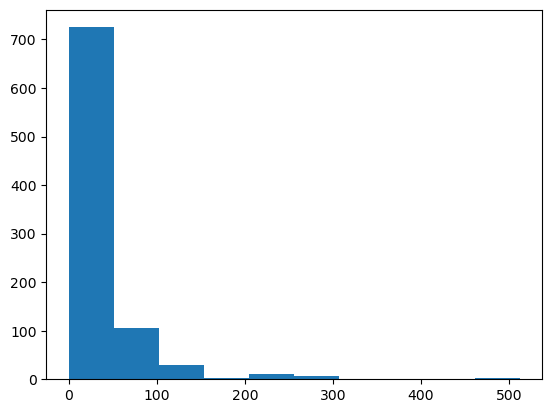

In [162]:
plt.hist(Tic['Fare'])

In [163]:
Tic.loc[Tic['Fare']>150].index

Int64Index([ 28,  89, 119, 259, 269, 298, 300, 312, 319, 333, 342, 378, 381,
            439, 499, 528, 558, 610, 680, 690, 701, 709, 717, 731, 738, 743,
            780, 857],
           dtype='int64', name='PassengerId')

In [164]:
Tic.loc[Tic['Fare']<6].index

Int64Index([180, 264, 272, 278, 303, 379, 414, 467, 482, 598, 634, 675, 733,
            807, 816, 823, 873],
           dtype='int64', name='PassengerId')

In [165]:
Tic = Tic.drop([28,  89, 119, 259, 269, 298, 300, 312, 319, 333, 342, 378, 381,
            439, 499, 528, 558, 610, 680, 690, 701, 709, 717, 731, 738, 743,
            780, 857, 180, 264, 272, 278, 303, 379, 414, 467, 482, 598, 634, 675, 733,
            807, 816, 823, 873])

(iii) SibSp Column

(array([570., 201.,  24.,  13.,   0.,  18.,   5.,   0.,   0.,   7.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

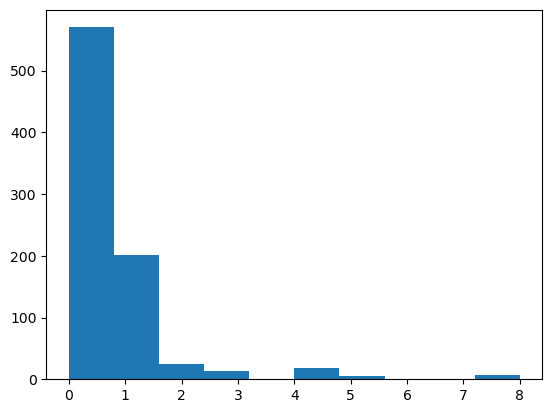

In [168]:
plt.hist(Tic['SibSp'])

In [189]:
Tic.loc[Tic['SibSp']>6].index

Int64Index([160, 181, 202, 325, 793, 847, 864], dtype='int64', name='PassengerId')

In [190]:
Tic = Tic.drop([160, 181, 202, 325, 793, 847, 864])

6. Min Max Scaling on the feature set 

In [217]:
X=Tic.drop(['Survived','Name','Sex','Ticket','Fare','Cabin','Embarked'],axis=1)  #Features
Y=Tic['Survived']  #Target column
X

,Pclass,Age,SibSp,Parch
PassengerId,,,,
1,3,22.000000,1,0
2,1,38.000000,1,0
3,3,26.000000,0,0
4,1,35.000000,1,0
5,3,35.000000,0,0
...,...,...,...,...
887,2,27.000000,0,0
888,1,19.000000,0,0
889,3,29.699118,1,2


In [218]:
Y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 831, dtype: int64

In [204]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler(feature_range=(0,1))

In [208]:
X1=minmax.fit_transform(X)

In [209]:
type(X1)

numpy.ndarray

In [215]:
X1=pd.DataFrame(X1,columns=['Pclass','Age','SibSp','Parch'])
X1.describe()

,Pclass,Age,SibSp,Parch
count,831.000000,831.000000,831.000000,831.000000
mean,0.676895,0.364733,0.092659,0.057561
std,0.407751,0.163252,0.176803,0.130374
min,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.265823,0.000000,0.000000
50%,1.000000,0.363280,0.000000,0.000000
75%,1.000000,0.430380,0.200000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [219]:
X.describe()

,Pclass,Age,SibSp,Parch
count,831.000000,831.000000,831.000000,831.000000
mean,2.353791,29.813910,0.463297,0.345367
std,0.815502,12.896902,0.884015,0.782242
min,1.000000,1.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000
50%,3.000000,29.699118,0.000000,0.000000
75%,3.000000,35.000000,1.000000,0.000000
max,3.000000,80.000000,5.000000,6.000000
